In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pywavelets scikit-image


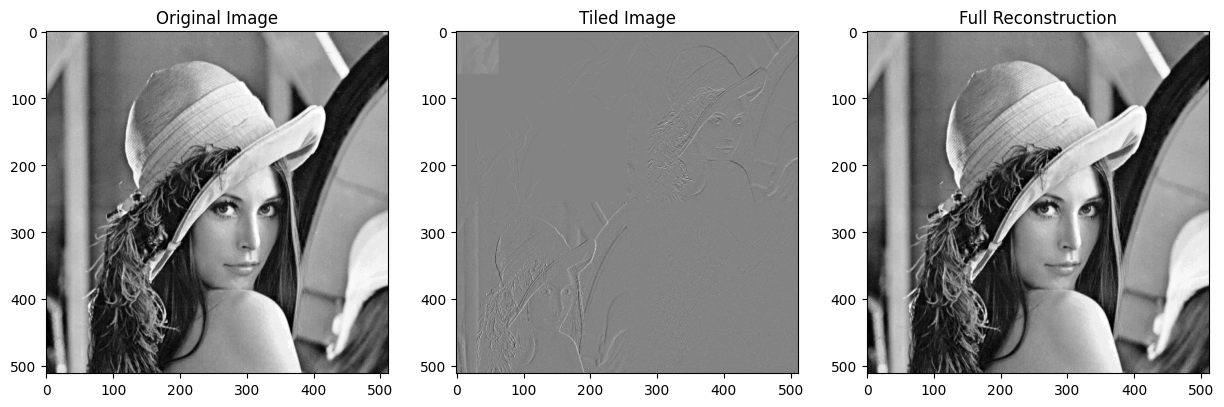

MSE = 8.392333984375e-05


In [ ]:
### Wavelet transform


import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error

# Load the image
img = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp', cv2.IMREAD_GRAYSCALE)

nLevel = 3  # Number of decompositions

# Perform the wavelet decomposition
cA_list, cH_list, cV_list, cD_list = [], [], [], []

start_image = img.copy()
for iLevel in range(1, nLevel + 1):
    cA, (cH, cV, cD) = pywt.dwt2(start_image, 'haar')
    cA_list.append(cA)
    cH_list.append(cH)
    cV_list.append(cV)
    cD_list.append(cD)
    start_image = cA

# Set the last level of cA to zeros
#cA_list[nLevel - 1] = np.zeros_like(cA_list[nLevel - 1])

# Set all cV levels to zeros
# for l in range(nLevel):
#     cV_list[l] = np.zeros_like(cV_list[l])

# Create tiled image
tiled_image = cA_list[nLevel - 1]

for iLevel in range(nLevel, 0, -1):
    top_left = tiled_image
    top_right = cH_list[iLevel - 1]
    bottom_left = cV_list[iLevel - 1]
    bottom_right = cD_list[iLevel - 1]

    top_row = np.concatenate((top_left, top_right), axis=1)
    bottom_row = np.concatenate((bottom_left, bottom_right), axis=1)

    tiled_image = np.concatenate((top_row/10, bottom_row/10), axis=0)


# Reconstruct original
full_recon = cA_list[nLevel - 1]

for iLevel in range(nLevel, 0, -1):
    full_recon = pywt.idwt2((full_recon, (cH_list[iLevel - 1], cV_list[iLevel - 1], cD_list[iLevel - 1])), 'haar')


# Convert to uint8 for display
full_recon = np.uint8(full_recon)

# Display the images
plt.figure(figsize=(15, 9))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(tiled_image, cmap='gray')
plt.title('Tiled Image')

plt.subplot(1, 3, 3)
plt.imshow(full_recon, cmap='gray')
plt.title('Full Reconstruction')
plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(img, full_recon)
print("MSE =", mse)


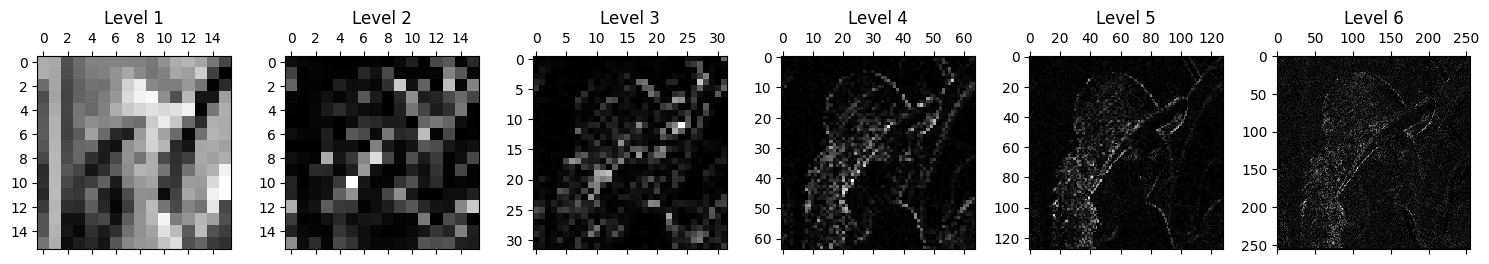

In [ ]:
### wavelet packet decomposition

import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import color, io

# Read the image and convert it to grayscale
img = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp', cv2.IMREAD_GRAYSCALE)

# Wavelet packet decomposition
level = 5
coeffs = pywt.wavedec2(img, 'haar', level=level)

# Plot the wavelet packet coefficients
fig, axes = plt.subplots(1, len(coeffs), figsize=(15, 5))

for i, coeff in enumerate(coeffs):
    if len(coeff) == 3:  # Assuming a color image with three channels
        for j in range(3):
            axes[i].matshow(np.abs(coeff[j]), cmap=plt.cm.gray)
            axes[i].set_title(f'Level {i + 1}')
    else:
        axes[i].matshow(np.abs(coeff), cmap=plt.cm.gray)
        axes[i].set_title(f'Level {i + 1}')


# Adjust layout for better visibility
plt.tight_layout()
plt.show()



<ipython-input-88-3c81a590caca>:17: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_reduce`. It will be removed in version 1.0. Please use `channel_axis` instead.
  B = transform.pyramid_reduce(B, downscale=2, multichannel=False)


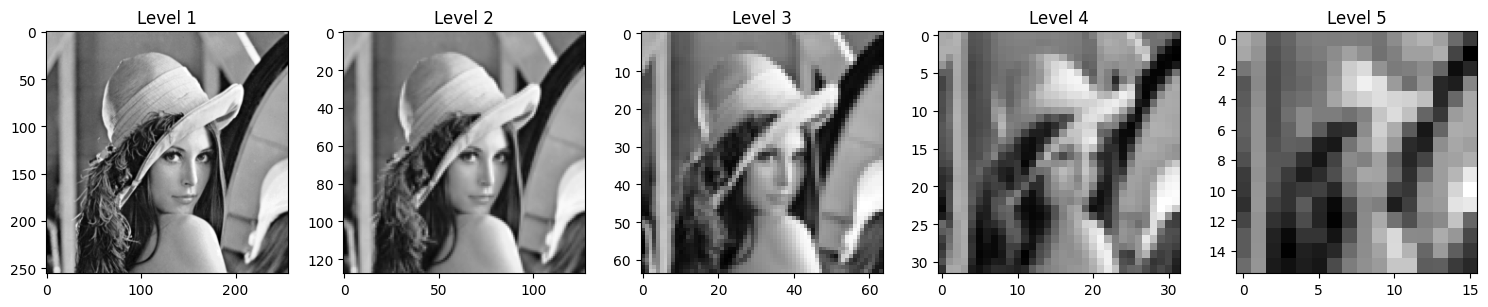

In [ ]:
### gaussian pyramid

import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, transform

# Read the image and convert it to grayscale
img = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp', cv2.IMREAD_GRAYSCALE)


level = 5

# Create a single subplot for all images
fig, axes = plt.subplots(1, level, figsize=(15, 3))

# Display images in the subplot
B = img
for i in range(level):
    B = transform.pyramid_reduce(B, downscale=2, multichannel=False)
    axes[i].imshow(B, cmap='gray')
    axes[i].set_title(f'Level {i + 1}')

plt.tight_layout()
plt.show()


<ipython-input-100-59e158e56f58>:19: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_reduce`. It will be removed in version 1.0. Please use `channel_axis` instead.
  md_img = transform.pyramid_reduce(cur_img, downscale=2, multichannel=False)
<ipython-input-100-59e158e56f58>:20: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_expand`. It will be removed in version 1.0. Please use `channel_axis` instead.
  upscaled = transform.pyramid_expand(md_img, upscale=2, multichannel=False)


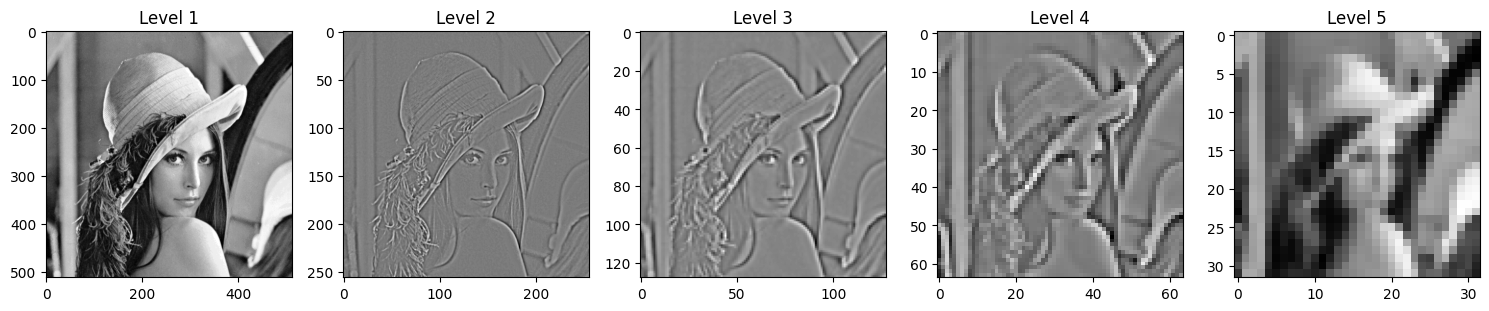

<ipython-input-100-59e158e56f58>:45: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_expand`. It will be removed in version 1.0. Please use `channel_axis` instead.
  reconstructed_img = pyr[i] + transform.pyramid_expand(reconstructed_img, upscale=2, multichannel=False)


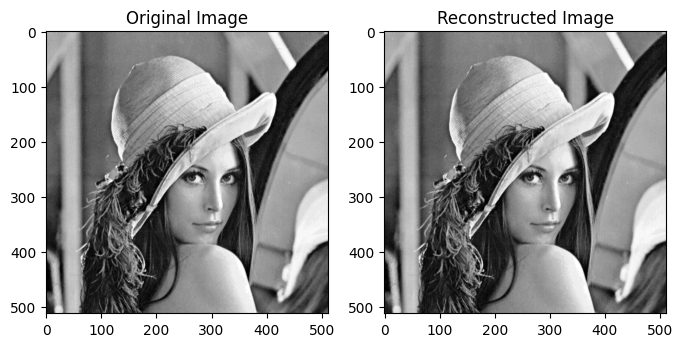

MSE = 0.0


In [ ]:
### Laplacian pyramid

import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, transform, util

# Read the image and convert it to grayscale
img = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp', cv2.IMREAD_GRAYSCALE)

# Set the number of levels
level = 5

# Create a Laplacian pyramid
pyr = []
cur_img = img

# Create a single subplot for all images
fig, axes = plt.subplots(1, level, figsize=(level * 3, 3))

for i in range(level - 1):
    md_img = transform.pyramid_reduce(cur_img, downscale=2, multichannel=False)
    upscaled = transform.pyramid_expand(md_img, upscale=2, multichannel=False)

    lp = cur_img - upscaled

    pyr.append(lp)

    cur_img = md_img

    # Display each level in the subplot
    axes[i].imshow(lp, cmap='gray')
    axes[i].set_title(f'Level {i + 1}')

# Add the last level to the subplot
pyr.append(md_img)
axes[level - 1].imshow(pyr[-1], cmap='gray')
axes[level - 1].set_title(f'Level {level}')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


# Reconstruct the image from the Laplacian pyramid
reconstructed_img = pyr[-1]
for i in range(level - 2, -1, -1):
    reconstructed_img = pyr[i] + transform.pyramid_expand(reconstructed_img, upscale=2, multichannel=False)

# Display the original and reconstructed images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(reconstructed_img, cmap='gray')
axes[1].set_title('Reconstructed Image')

plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(img, reconstructed_img)
print("MSE =", mse)

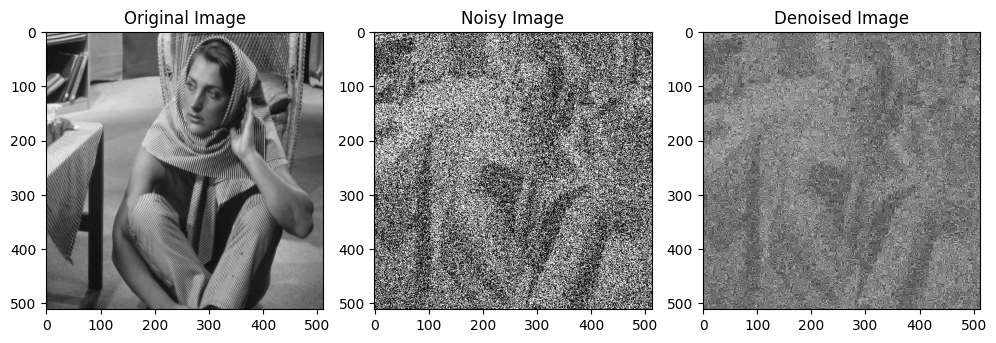

MSE BETWEEN NOISY AND ORIGINAL = 0.17182020759321642
MSE BETWEEN RECONSTRUCTED AND ORIGINAL = 0.07930525199898347


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, util
import pywt

def wavelet_denoise(image, n_level, threshold_type, threshold_value):
    cA = []
    cH = []
    cV = []
    cD = []

    # Construct wavelet coefficients
    start_image = image.copy()
    for i in range(n_level):
        cA_i, (cH_i, cV_i, cD_i) = pywt.dwt2(start_image, 'haar')

        # Apply thresholding to detail coefficients
        cH_i = pywt.threshold(cH_i, 0.6745,'hard')
        cV_i = pywt.threshold(cV_i, 0.6745,'hard')
        cD_i = pywt.threshold(cD_i, 0.6745,'hard')

        cA.append(cA_i)
        cH.append(cH_i)
        cV.append(cV_i)
        cD.append(cD_i)

        start_image = cA_i

    # Reconstruct the denoised image
    full_recon = cA[-1]
    for i in range(n_level - 1, -1, -1):
        full_recon = pywt.idwt2((full_recon, (cH[i], cV[i], cD[i])), 'haar')

    return full_recon

# Load the image
img = io.imread('/content/drive/MyDrive/Image_Processing_Photos/Barbara.bmp')  # Replace 'path_to_your_image_file' with the actual file path
img_gray = color.rgb2gray(img)

# Add Gaussian noise
noisy_image = util.random_noise(img_gray, mode='gaussian', var=0.6)

# Perform wavelet denoising
denoised_image = wavelet_denoise(noisy_image, n_level=3, threshold_type='s', threshold_value=0.6745)

# Display the original, noisy, and denoised images
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.tight_layout()
plt.show()

# Display MSE between original and noisy, and original and denoised images
print("MSE BETWEEN NOISY AND ORIGINAL =", np.mean((img_gray - noisy_image)**2))
print("MSE BETWEEN RECONSTRUCTED AND ORIGINAL =", np.mean((img_gray - denoised_image)**2))
